# Supervised Learning: Neural Networks (Deep Learning)

In [1]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from IPython.display import display
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Overview

이 책에서는 딥러닝의 일부인 `multi-layter perceptron`에 대해서만 다룹니다. Regression, Classification 모두 가능하지만, 여기서는 Classification 만 살펴봅니다.

## NN model and hidden layers

Neural Network 은 logistic regression 에 hidden layer 를 넣어준 것입니다. Layer 를 몇층으로 넣어주느냐, 각각의 layer 를 어떻게 구성하느냐에 따라서 어떤 모델을 구성하는지가 결정이 되죠.

각각의 hidden layer 의 노드는 `tanh` (tangens hyperbolicus), `relu` (rectifying nonlinearity) 등으로 구성이 가능합니다. (자세한 것은 다른 딥러닝 책들을 참고하시길 바랍니다.)

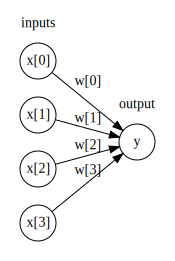

In [3]:
mglearn.plots.plot_logistic_regression_graph()

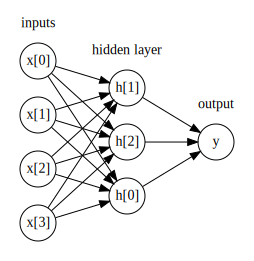

In [4]:
mglearn.plots.plot_single_hidden_layer_graph()

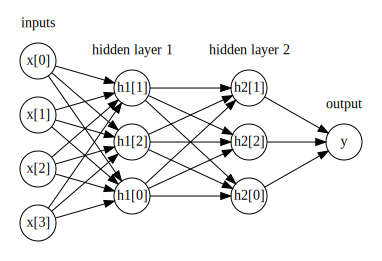

In [5]:
mglearn.plots.plot_two_hidden_layer_graph()

## Example: make_moons()

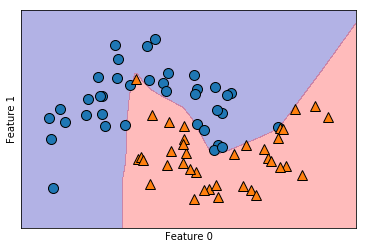

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

나름 잘 나누어져 있는 것을 볼 수 있습니다. 여기서 우리가 어떤 파라메터를 정할 수 있는지 볼까요?

```
Init signature:
MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=200,
    shuffle=True,
    random_state=None,
    tol=0.0001,
    verbose=False,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
)
```

굉장히 많습니다. 여기서 우리가 관심 있는 것들은

- `hidden_layer_sizes`: 1레이어 100개의 노드가 기본입니다. 우리는 1~2레이어, 10~100개의 노드로 바꿀 수 있겠구요.
- `activation`: `relu`, `tanh`바꾸어 볼 수 있습니다.
- `solver`: `lbfgs`, `adam`쓸 수가 있구요.
    - 참고로, 책에서는 `algorithm`파라메터라고도 합니다. `scikit-learn`버전이 바뀌면서 `algorithm`이 `solver`로 바뀐듯요.
- `alpha`: [Linear Models](02-linear-models.ipynb)에서 배운 것과 같습니다. 값이 작을수록 regularization 이 적고, training set과 비슷하죠.

책에서는 이런 저런식으로 바꿔서 테스트를 해봅니다. 그 중에 한 코드만 가져와 봅니다.

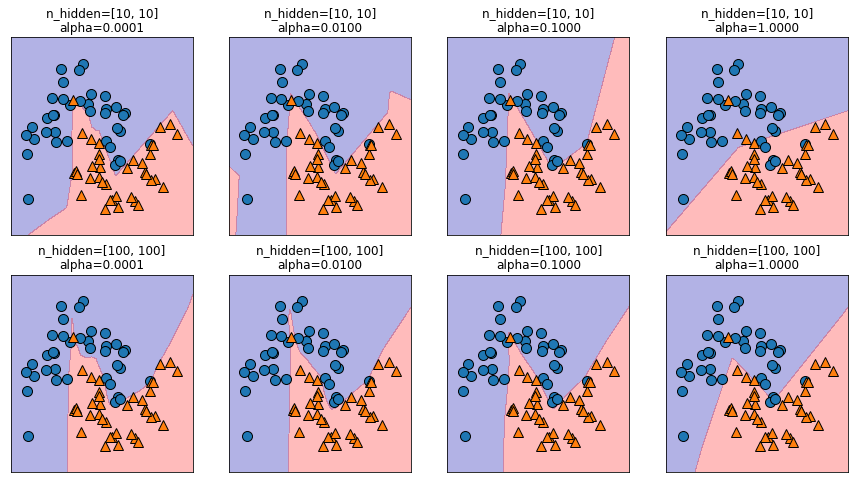

In [7]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
            n_hidden_nodes, n_hidden_nodes, alpha))

## Dataset: Cancer

실제 데이터셋을 가지고 prediction score 를 높이는 작업을 해봅니다.

In [8]:
cancer = sklearn.datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


[SVM](02-svm.ipynb)에서 처럼 data preprocessing 을 좀 해줍니다.

In [9]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)
# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format( mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


아직 training, test 셋간의 갭이 좀 큽니다. `alpha`를 높여서 regularization을 좀 더 해보죠.

In [10]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format( mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


## Optimizers

딥러닝 링크들을 읽어보면 (예를들어, [100장짜리 슬라이드: 자습해도 모르겠던 딥러닝, 머리속에 인스톨 시켜드립니다.](https://www.slideshare.net/yongho/ss-79607172)) 좋은 설명이 많습니다.

| Optimizer | 설명 |
|--|--|
| lbfgs | [wiki](https://en.wikipedia.org/wiki/Limited-memory_BFGS) |
| SGD | GD 가 잘되는 optimizer, SGD 는 mini-batch 로 나누어져서 더 빠르게 잘됨. |
| Adam | GD의 장점에 더 정확하게 목표지점으로 찾아감. 최근 더 좋은게 나왔을지 모르지만 모르면 이걸 기본으로 쓰면 보통 젤 잘됨.| 

## 장단점
- 장점
    - 요새 트렌드로 가장 짱짱짱. 시간, 리소스만 잘되면 짱.
- 단점
    - 시간, 리소스 많이 먹음 (그래도, 빠른 발전으로 그것마저 극복됨)